# Differentiation in Theano vs Sympy

In [1]:
#run below comment to install theano so we can call import theano and whatnot below
! pip install theano

     |████████████████████████████████| 2.8 MB 1.5 MB/s eta 0:00:01     |████████████████████████▎       | 2.2 MB 1.5 MB/s eta 0:00:01
  Created wheel for theano: filename=Theano-1.0.4-py3-none-any.whl size=2667177 sha256=78b3cbaeaba1effe565d864603da5500ba2a7b763264c43f3f05ac5c5889dc69
  Stored in directory: /home/jovyan/.cache/pip/wheels/33/e0/86/12647586a15bd29c062c9996231380908fb2dcf6a5df1c6f84
Successfully built theano


* Zhouming (MingMing) Sun
* Musaab Al-Bakry
* Rebecca Jacobs 


## About the method

I was really interested by symbolic differentiation, so I tried to do it in a more efficient and cleaner way to understand higher order deriviatives on a function with respect to x. 

According to wikipedia: "Theano is a Python library and optimizing compiler for manipulating and evaluating mathematical expressions, especially matrix-valued ones. In Theano, computations are expressed using a NumPy-esque syntax and compiled to run efficiently on either CPU or GPU architectures."

Theano can do derivatives, but it also has the ability to produce computational graphs, as seen in x_squared_derivative.png and x_cubed_derivative.png. So I thought it would be super neat to have it do a higher order derivative, and then give us a computation graph. My goal is to compare symbolic differentiation results between theano and sympy for basic polynomials. 

In [7]:
import numpy
import theano
import theano.tensor as T
from theano import pp

#here is a basic example of taking derivative of x^2
x = T.dscalar('x')
y = x ** 2
gy = T.grad(y, x)
print(pp(gy))  # print out the gradient prior to optimization
print("The derivative is right, once you look past the tensorconstant stuff:   2 * x ^ (2-1)")


f = theano.function([x], gy)

#calculate value of x=4. 2*4 = 8, seems good
print(f(4))

print("final result below in reduced form, it seems. 2x is indeed the derivative of x^2: ")
pp(f.maker.fgraph.outputs[0])
#theano.printing.pydotprint(f, outfile="looped_derivatives.png", var_with_name_simple=True)

((fill((x ** TensorConstant{2}), TensorConstant{1.0}) * TensorConstant{2}) * (x ** (TensorConstant{2} - TensorConstant{1})))
The derivative is right, once you look past the tensorconstant stuff:   2 * x ^ (2-1)
8.0
final result below in reduced form, it seems. 2x is indeed the derivative of x^2: 


'(TensorConstant{2.0} * x)'

In [8]:
#i want to have a function that derives an expression f_x with respect to x, n times. then print out the computational graph

#takes in a function of x, x data type, and n number of times to derive f_x
#this is my own wack function
def deriv_loop(f_x, x, n):
    dx = f_x
    for i in range(n):
        dx = T.grad(dx, x)
    return dx

#let's first test on x^10, derived 5 times. The answer should be 30240 * x^5
x = T.dscalar('x')
y = x ** 10
g = deriv_loop(y, x, 5)

print(pp(g))
print("wow that looks terrible, but it is before optimization")
print()

h = theano.function([x], g)
print(h(2))
print("yay that is right. 30240 * 2^5 = 967680 indeed")
print()

print("Below is the optimized form. It looks off. IDK what the whole left half is doing. The 30240 is correct though, so it is still somehow right")
pp(h.maker.fgraph.outputs[0])


(((fill((((fill((((fill((((fill(((fill((x ** TensorConstant{10}), TensorConstant{1.0}) * TensorConstant{10}) * (x ** (TensorConstant{10} - TensorConstant{1}))), TensorConstant{1.0}) * (fill((x ** TensorConstant{10}), TensorConstant{1.0}) * TensorConstant{10})) * (TensorConstant{10} - TensorConstant{1})) * (x ** ((TensorConstant{10} - TensorConstant{1}) - TensorConstant{1}))), TensorConstant{1.0}) * ((fill(((fill((x ** TensorConstant{10}), TensorConstant{1.0}) * TensorConstant{10}) * (x ** (TensorConstant{10} - TensorConstant{1}))), TensorConstant{1.0}) * (fill((x ** TensorConstant{10}), TensorConstant{1.0}) * TensorConstant{10})) * (TensorConstant{10} - TensorConstant{1}))) * ((TensorConstant{10} - TensorConstant{1}) - TensorConstant{1})) * (x ** (((TensorConstant{10} - TensorConstant{1}) - TensorConstant{1}) - TensorConstant{1}))), TensorConstant{1.0}) * ((fill((((fill(((fill((x ** TensorConstant{10}), TensorConstant{1.0}) * TensorConstant{10}) * (x ** (TensorConstant{10} - TensorCons

'Elemwise{Composite{(i0 * Composite{(sqr(sqr(i0)) * i0)}(i1))}}(TensorConstant{30240.0}, x)'

In [9]:
#let's see what the computation graph looks like! 
theano.printing.pydotprint(h, outfile="looped_derivatives.png", var_with_name_simple=True)

The output file is available at looped_derivatives.png


After checking out that output file... 
Well that was not what I was looking for. I was hoping for some complex looking loopy graph, but instead it treated 5 derivatives as one operation. It also returned something weird for the final reduced form of the 5th derivative of x^10. However, the test of h(2) returned the correct answer, so it must be doing something right. (I tested several other values and they all seem correct.)

Let's compare this to sympy: 

In [10]:
import sympy
from sympy.abc import x
k = x ** 10
k

x**10

In [6]:
k = sympy.diff(k, x)
k = sympy.diff(k, x)
k = sympy.diff(k, x)
k = sympy.diff(k, x)
k = sympy.diff(k, x)
k

30240*x**5

## Trying to Break Theano with different functions 

I was trying to come up with functions that may be costly or take a considerable amount of time to compute in Theanos. However, many deriatives get complicated quickly and I had another idea to try and "break" the program- how about trying to differentiate a function that doesn't actually have a derivative?



## What happens when you try to differentiate a function in Theano that doesn't have a derivative?

I was interested in this concept and came across a function called the Weierstrass function that is continuous everywhere but differentiable nowhere. (neat!) 




![](https://sites.math.washington.edu/~conroy/general/weierstrass/weier01.gif)

The Weierstrass function is defined as 

(need to add function here)



In [25]:
# trying to run the Weierstrass function in Theano

import numpy as nump
import theano
import theano.tensor as T
from theano import pp

# Weierstrass function 


#here is a basic example of taking derivative of x^2
x = T.dscalar('x')
# y = x ** 2

y = nump.cos(1**x*nump.pi*x) / 2**x

gy = T.grad(y, x)
print(pp(gy))  # print out the gradient prior to optimization

# print("The derivative is right, once you look past the tensorconstant stuff:   2 * x ^ (2-1)")


f = theano.function([x], gy)

#calculate value of x=4. 2*4 = 8, seems good
print(f(4))

# print("final result below in reduced form, it seems. 2x is indeed the derivative of x^2: ")
pp(f.maker.fgraph.outputs[0])
#theano.printing.pydotprint(f, outfile="looped_derivatives.png", var_with_name_simple=True)

((switch(eq(TensorConstant{1}, TensorConstant{0}), TensorConstant{0}, ((((((-(fill((cos((((TensorConstant{1} ** x) * TensorConstant{3.141592653589793}) * x)) / (TensorConstant{2} ** x)), TensorConstant{1.0}) / (TensorConstant{2} ** x))) * sin((((TensorConstant{1} ** x) * TensorConstant{3.141592653589793}) * x))) * x) * TensorConstant{3.141592653589793}) * log(TensorConstant{1})) * (TensorConstant{1} ** x))) + (((-(fill((cos((((TensorConstant{1} ** x) * TensorConstant{3.141592653589793}) * x)) / (TensorConstant{2} ** x)), TensorConstant{1.0}) / (TensorConstant{2} ** x))) * sin((((TensorConstant{1} ** x) * TensorConstant{3.141592653589793}) * x))) * ((TensorConstant{1} ** x) * TensorConstant{3.141592653589793}))) + switch(eq(TensorConstant{2}, TensorConstant{0}), TensorConstant{0}, ((((-(fill((cos((((TensorConstant{1} ** x) * TensorConstant{3.141592653589793}) * x)) / (TensorConstant{2} ** x)), TensorConstant{1.0}) * cos((((TensorConstant{1} ** x) * TensorConstant{3.141592653589793}) * x

'Elemwise{Composite{(((i0 * sin((i1 * (i2 ** i3) * i3)) * (i2 ** i3)) / (i4 ** i3)) + ((i5 * cos((i1 * (i2 ** i3) * i3))) / (i4 ** i3)))}}(TensorConstant{-3.141592653589793}, TensorConstant{3.141592653589793}, TensorConstant{1}, x, TensorConstant{2}, TensorConstant{-0.6931471824645996})'

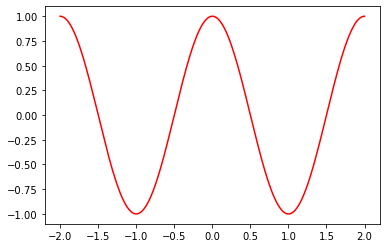

In [23]:
import numpy as nump
import matplotlib.pyplot as plt

M = 100000

def wei(x, N):
    y = nump.zeros((1,M))
    for n in range(1,N):
        y = y + nump.cos(1**n*nump.pi*x) / 2**n
    return y


x = nump.linspace(-2,2,M)
y = nump.reshape(wei(x,500), (M,))

plt.plot(x, y, 'r-')
plt.show()

# not quite working as I'd hoped 

## Conclusion about the method

Ok, granted, I did hardcode 5 derivatives for sympy, but still. It is a little embarrasing how easy sympy handled this compared to theano. If I were to explore this further, I should compare calculation times, and test more complex functions that aren't just easy polynomials. Perhaps theano will shine there. The theano repeated derivative function was also made by me, and that is probably also a major factor as to why the 5th derivative and computation graph looks like pasta. 

I guess for the case of very simple polynomial symbolic differentiation, a sympy derivative gives a much clearer answer than a theano handicapped with questionable code. 

### Questions you have about the method

* How exactly does that computation graph work? 
* Also, what exactly is a tensor? Those seem to be the foundation of theano. 

## Tensors 
![](https://papers.bastolasushan.com/wp-content/uploads/2019/11/fig0201a.png)

What are tensors?

Tensors are a type of data structure similar to a vector or matrix, but with n-dimensions. You can perform operations on tensors like addition, subtraction, and multiplication, similar to matricies, but they are a bit more involved. 

Why does Theano use tensors?





## About the software

Theano was developed by Montreal Institute for Learning Algorithms (MILA), University of Montreal, up until late 2017

Link to the repository: https://github.com/Theano/Theano 

Official tutorial: http://www.deeplearning.net/software/theano/index.html

Here is their summary from their tutorial: 

Theano is a Python library that allows you to define, optimize, and evaluate mathematical expressions involving multi-dimensional arrays efficiently. Theano features:

* tight integration with NumPy – Use numpy.ndarray in Theano-compiled functions.
* transparent use of a GPU – Perform data-intensive computations much faster than on a CPU.
* efficient symbolic differentiation – Theano does your derivatives for functions with one or many inputs.
* speed and stability optimizations – Get the right answer for log(1+x) even when x is really tiny.
* dynamic C code generation – Evaluate expressions faster.
* extensive unit-testing and self-verification – Detect and diagnose many types of errors.
* Theano has been powering large-scale computationally intensive scientific investigations since 2007. But it is also approachable enough to be used in the classroom (University of Montreal’s deep learning/machine learning classes).

### Open questions

* Any open questions you would like to discuss or get help answering?
No. See the other questions above. 